In [1]:
%matplotlib inline

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import datetime as dt

conn=pymysql.connect("www.a667.com","kairuitouzi","kai070122","carry_investment",charset='utf8' ) 
sql="SELECT  * FROM wh_same_month_min WHERE prodcode='HSI'"
sql="SELECT  * FROM wh_same_month_day WHERE prodcode='HSI'"
df1=pd.read_sql(sql,conn)
df1.set_index('datetime',inplace=True)
df1['Time']=df1.index.time
df1['Date']=df1.index.date
df1

,prodcode,open,high,low,close,vol,position,settlement,ratio,id,Time,Date
datetime,,,,,,,,,,,,
1992-02-03 16:15:00,HSI,4695.0,4710.0,4695.0,4710.0,0.0,254,4710.0,0.500000,6522,16:15:00,1992-02-03
1992-02-07 16:15:00,HSI,4723.0,4752.0,4719.0,4740.0,0.0,254,4740.0,0.500000,6523,16:15:00,1992-02-07
1992-02-10 16:15:00,HSI,4715.0,4784.0,4715.0,4775.0,0.0,254,4775.0,0.500000,6524,16:15:00,1992-02-10
1992-02-11 16:15:00,HSI,4775.0,4775.0,4728.0,4738.0,0.0,254,4738.0,0.500000,6525,16:15:00,1992-02-11
1992-02-12 16:15:00,HSI,4740.0,4775.0,4740.0,4775.0,0.0,254,4775.0,0.500000,6526,16:15:00,1992-02-12
1992-02-13 16:15:00,HSI,4790.0,4806.0,4780.0,4800.0,0.0,254,4800.0,0.500000,6527,16:15:00,1992-02-13
1992-02-14 16:15:00,HSI,4805.0,4820.0,4784.0,4792.0,0.0,254,4792.0,0.500000,6528,16:15:00,1992-02-14
1992-02-17 16:15:00,HSI,4800.0,4800.0,4770.0,4776.0,0.0,254,4776.0,0.500000,6529,16:15:00,1992-02-17
1992-02-18 16:15:00,HSI,4765.0,4805.0,4765.0,4784.0,0.0,254,4784.0,0.500000,6530,16:15:00,1992-02-18


In [41]:

dt1=dt.date(2019,3,21)
tm1=dt.time(9)
df9=df1[(df1.Date==dt1) & (df1.Time>tm1)]
length=len(df9)
df9['close'].values

array([ 29384.,  29434.,  29428.,  29417.,  29424.,  29432.,  29430.,
        29421.,  29421.,  29408.,  29404.,  29405.,  29402.,  29401.,
        29414.,  29401.,  29402.,  29430.,  29419.,  29412.,  29385.,
        29373.,  29362.,  29356.,  29364.,  29378.,  29374.,  29399.,
        29396.,  29380.,  29365.,  29360.,  29391.,  29410.,  29441.,
        29452.,  29424.,  29434.,  29411.,  29405.,  29370.,  29361.,
        29382.,  29401.,  29381.,  29379.,  29385.,  29404.,  29415.,
        29416.,  29421.,  29418.,  29413.,  29417.,  29407.,  29405.,
        29399.,  29390.,  29393.,  29424.,  29445.,  29421.,  29408.,
        29409.,  29402.,  29394.,  29403.,  29408.,  29420.,  29424.,
        29405.,  29430.,  29417.,  29419.,  29418.,  29440.,  29442.,
        29430.,  29433.,  29421.,  29430.,  29444.,  29473.,  29431.,
        29442.,  29459.,  29452.,  29469.,  29467.,  29465.,  29449.,
        29461.,  29472.,  29472.,  29459.,  29458.,  29450.,  29437.,
        29420.,  294

In [12]:
vv1=df1.tail(40)['close'].values

In [13]:
vv2=df1['close'].values

161


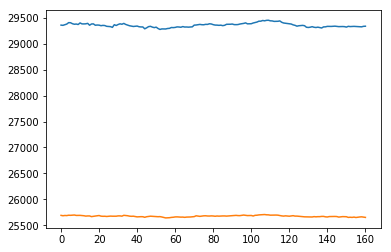

In [71]:
plt.plot(d1)
plt.plot(d2[res[0]:res[0]+length])
print(length)

In [21]:
rows=len(vv2)
length=len(vv1)
maxCorr=0
res=[]
resList=[]
# dt1=dt.datetime.now
for i in range(0,rows-length*2):
    vv3=vv2[i:length+i]
    corr=round(np.corrcoef(vv1,vv3)[0][1],3)
    #print(i,corr)
    resList.append([i,corr])
    if corr>maxCorr:
        maxCorr=corr
        res=[i,maxCorr]
# dt2=dt.datetime.now
# print(dt2-dt1)
print(res)

[35, 0.979]


In [19]:
dt2.time()

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [23]:
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle


def DrawKK(aa):
    fig = plt.figure(figsize=(30, 12))
    ax = fig.add_subplot(111)
    ax1 = ax.twinx()

    ax.clear()
    ax1.clear()
    k_width = 50
    k_diff = 10
    kline = k_width + k_diff
    d=0
    for i in aa.iterrows():
        d=d+1
        x = d * kline
        O = i[1]['open']
        C = i[1]['close']
        L = i[1]['low']
        H = i[1]['high']
        hh = abs(C - O)
        x1 = x + k_width / 2
        if C > O:
            a = False
            y = O
            cc = 'R'
            # 上影线 下影线
            line1 = Line2D((x1, x1), (C, H), color=cc)
            line2 = Line2D((x1, x1), (O, L), color=cc)

            ax.add_line(line1)
            ax.add_line(line2)
        else:
            a = True
            y = C
            cc = 'C'
            # 影线
            line = Line2D((x1, x1), (L, H), color=cc)
            ax.add_line(line)
        hh = abs(C - O)

        # K线实体
        rec = Rectangle((x, y), k_width, hh, fill=a, color=cc)

        # MACD
        ax.add_patch(rec)



    ax1.set_ylim(-200, 200)

    ax.grid()

    ax.autoscale_view()
    ax.legend()
    ax1.autoscale_view()
    time1=str(aa.index[0])
    time2=str(aa.index[-1])
    plt.title(time1+"---"+time2, fontsize=20, color='r')
    return plt


No handles with labels found to put in legend.


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

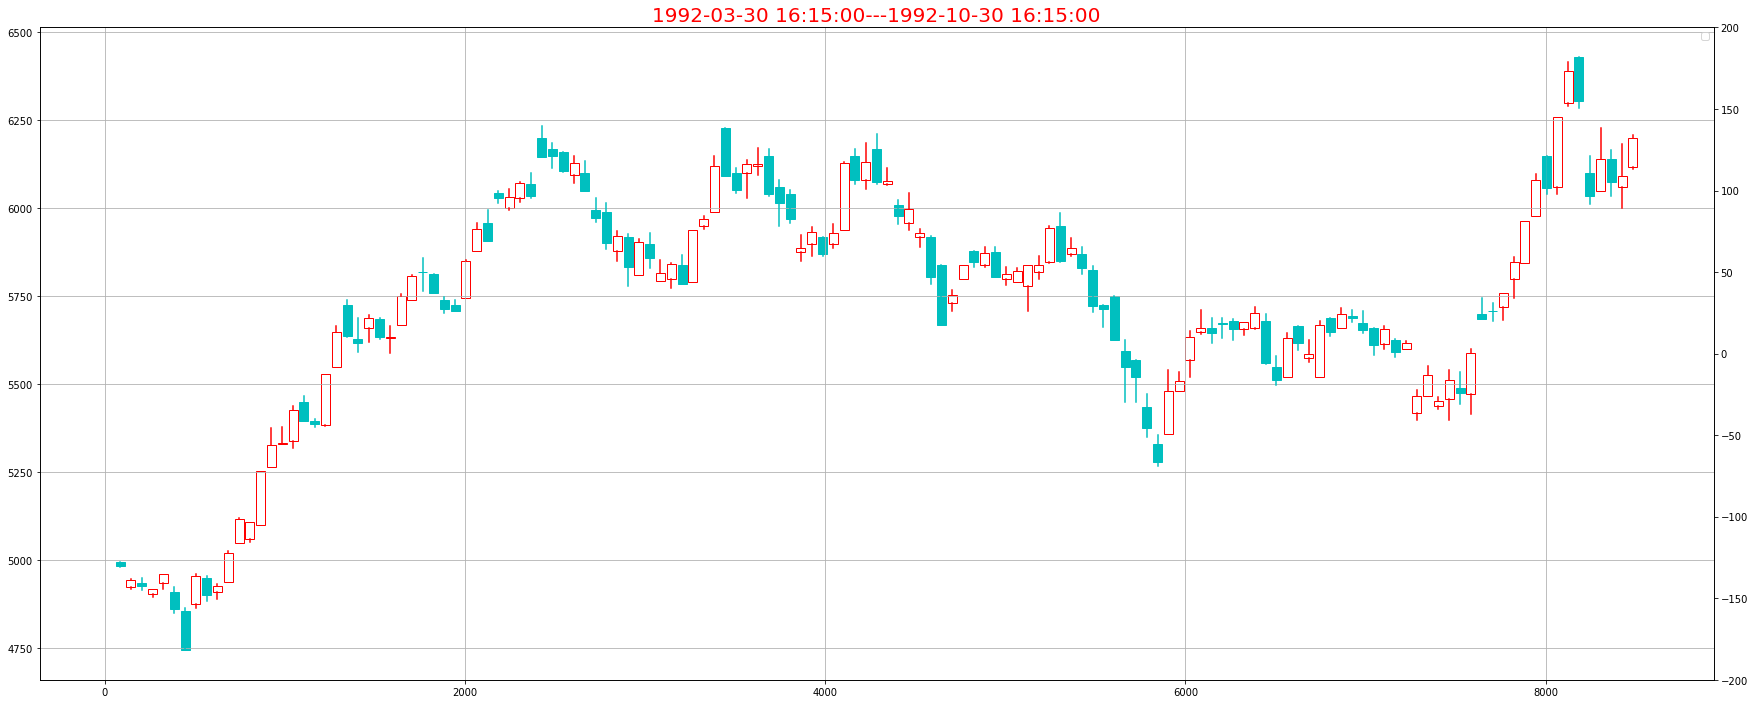

In [26]:
df2=df1.iloc[res[0]-1:res[0]+length+100]
DrawKK(df2)

No handles with labels found to put in legend.


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

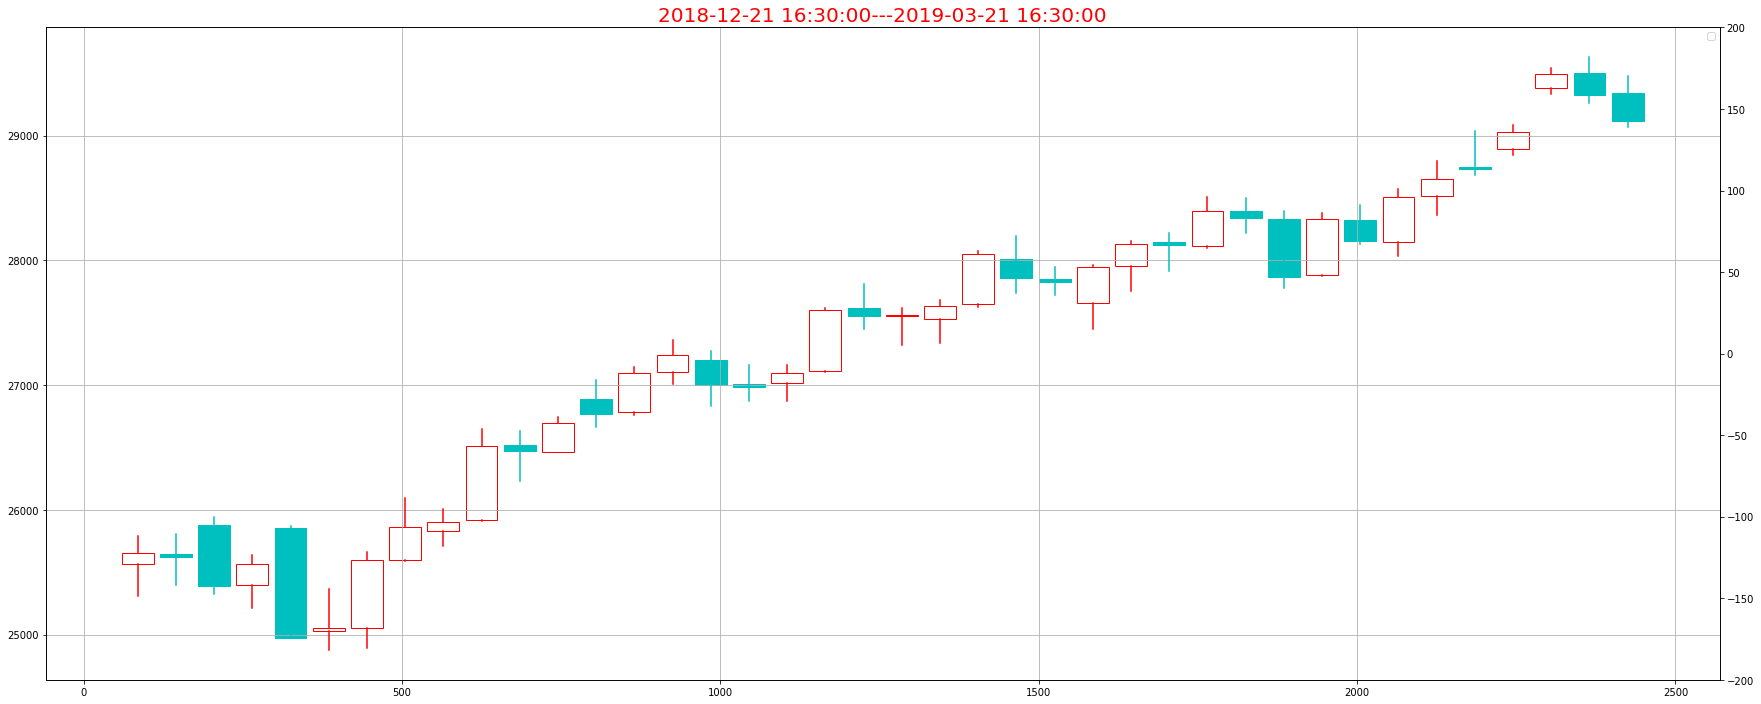

In [28]:
dt1=dt.date(2019,3,21)
tm1=dt.time(9)
df4=df1.tail(40)
DrawKK(df4)

No handles with labels found to put in legend.


No     3839.000
Res       0.968
Name: 3839, dtype: float64


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

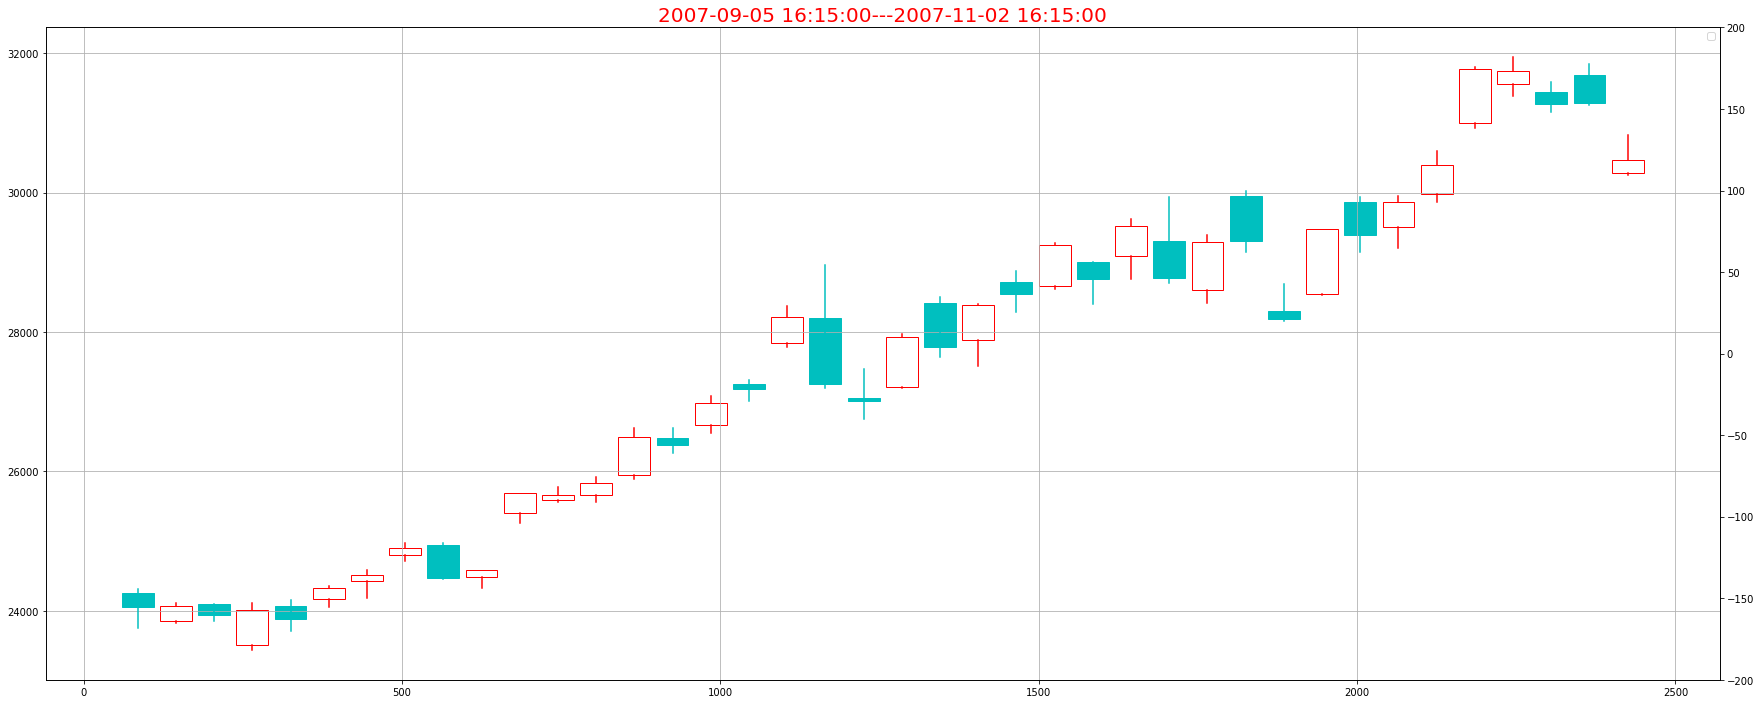

In [46]:
index=9
ind=newRec.index[index]
df2=df1.iloc[ind:ind+length]
print(newRec.iloc[index])
DrawKK(df2)

In [36]:
newRec.index[2]

6126

In [29]:
recc=pd.DataFrame(resList)
recc.columns=['No','Res']
newRec=recc.sort_values('Res',ascending=False)
newRec

,No,Res
35,35,0.979
36,36,0.979
6126,6126,0.973
6127,6127,0.972
2754,2754,0.972
6128,6128,0.971
38,38,0.970
5117,5117,0.969
37,37,0.969
3839,3839,0.968


In [32]:
newRec.iloc[-1]['Res']

-0.972

In [2]:
from KRData.HKData import HKFuture
import configparser
import datetime

conf_parser = configparser.ConfigParser()
conf_parser.read( 'conf.ini')
db_host = conf_parser.get('MGDB', 'host')
db_user = conf_parser.get('MGDB', 'user')
db_password = conf_parser.get('MGDB', 'password')

hk = HKFuture(pwd=db_password,host=db_host,user=db_user)
hk.get_all_codes()
_fields = ['datetime', 'code', 'open', 'high', 'low', 'close', 'vol']
hsi=hk.get_main_contract_bars('HSI', _fields)

In [44]:
d2=hsi['close'].values
len(d2)

1221197

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

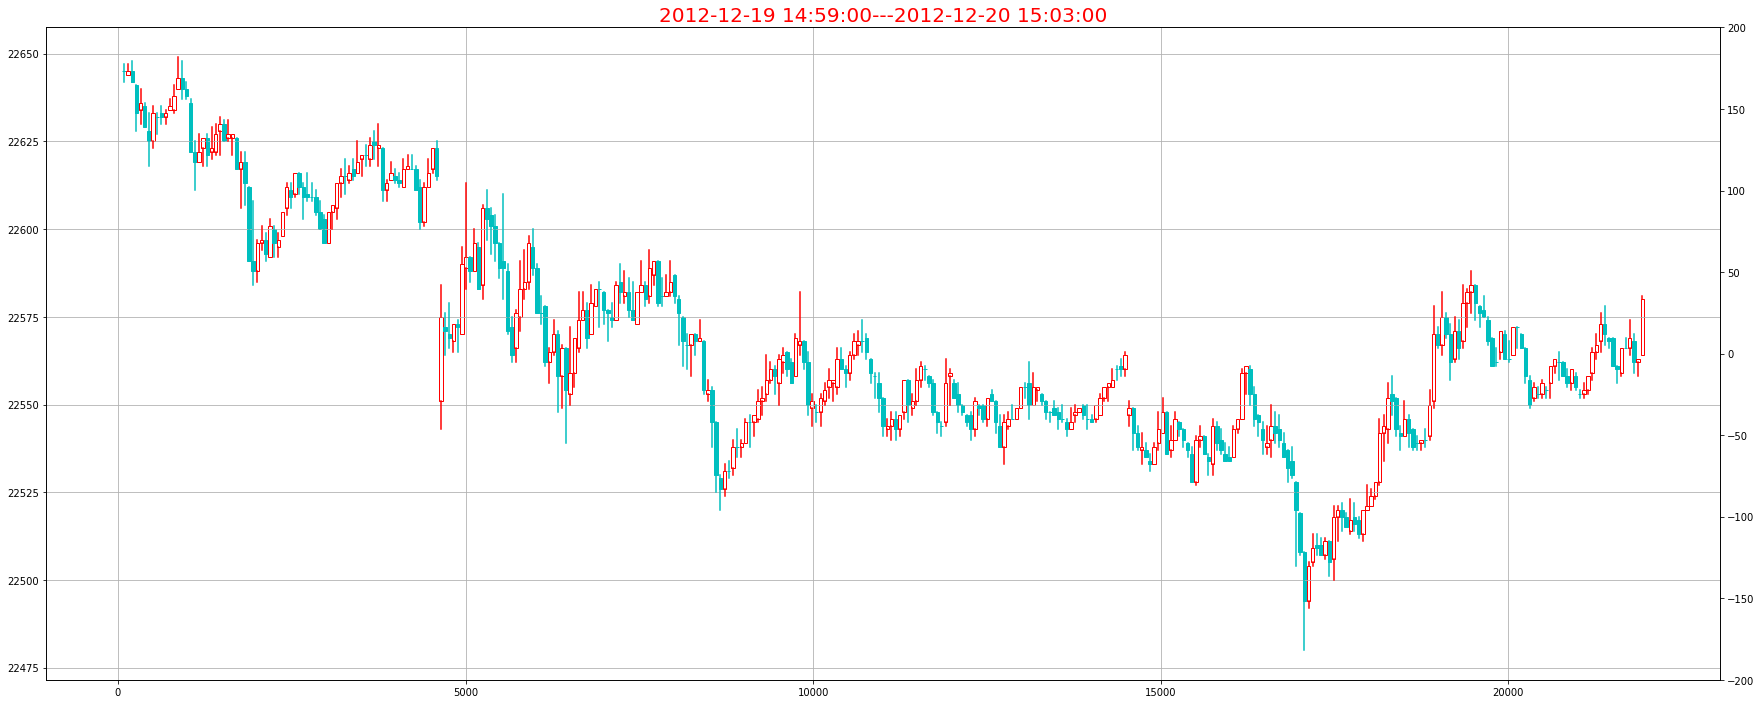

In [46]:
index=newRec.iloc[0]['Res']
df2=hsi.iloc[ind:ind+length+100]
DrawKK(df2)